In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
data = pd.read_csv("업종별/중식 음식점업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698803 entries, 0 to 698802
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      698803 non-null  object
 1   CARD_SIDO_NM  698803 non-null  object
 2   CARD_CCG_NM   695789 non-null  object
 3   STD_CLSS_NM   698803 non-null  object
 4   HOM_SIDO_NM   698803 non-null  object
 5   HOM_CCG_NM    695297 non-null  object
 6   AGE           698803 non-null  object
 7   SEX_CTGO_CD   698803 non-null  int64 
 8   FLC           698803 non-null  int64 
 9   CSTMR_CNT     698803 non-null  int64 
 10  AMT           698803 non-null  int64 
 11  CNT           698803 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 69.3+ MB
None


In [5]:
#안쓰는 컬럼 드랍, 정제
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698803 entries, 0 to 698802
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      698803 non-null  object
 1   CARD_SIDO_NM  698803 non-null  object
 2   HOM_SIDO_NM   698803 non-null  object
 3   AGE           698803 non-null  object
 4   SEX_CTGO_CD   698803 non-null  int64 
 5   FLC           698803 non-null  int64 
 6   CSTMR_CNT     698803 non-null  int64 
 7   AMT           698803 non-null  int64 
 8   CNT           698803 non-null  int64 
 9   year          698803 non-null  int64 
 10  month         698803 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 64.0+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  10s            1    1          3   
1   201901           강원          강원  10s            2    1          5   
2   201901           강원          강원  20s            1  

In [7]:
print(df.CARD_SIDO_NM.unique())
print(df.HOM_SIDO_NM.unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
['강원' '경기' '경남' '경북' '대구' '부산' '서울' '세종' '울산' '인천' '충남' '충북' '광주' '대전'
 '전북' '제주' '전남']


CARD_SIDO_NM
세종      5011141607
제주     13111179847
울산     15978861657
전남     18921663263
충북     21118495535
강원     21132035819
대전     21545187095
경북     25943201220
광주     26734177362
전북     30570891381
충남     32706990364
경남     38580609110
대구     43685636495
인천     46838185215
부산     56608667657
경기    246511352922
서울    287363147031
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

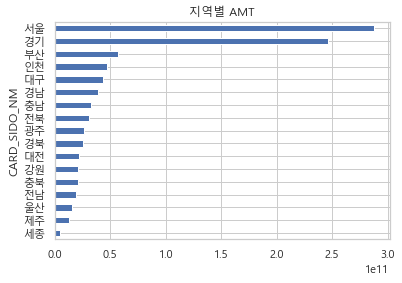

In [8]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901    62665004697
201902    59172364534
201903    67840648226
201904    63756965708
201905    68027851961
201906    65109670937
201907    67091569114
201908    65797678657
201909    61776234983
201910    65437711892
201911    63069464739
201912    72129375455
202001    65678947057
202002    54287340957
202003    50520594663
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

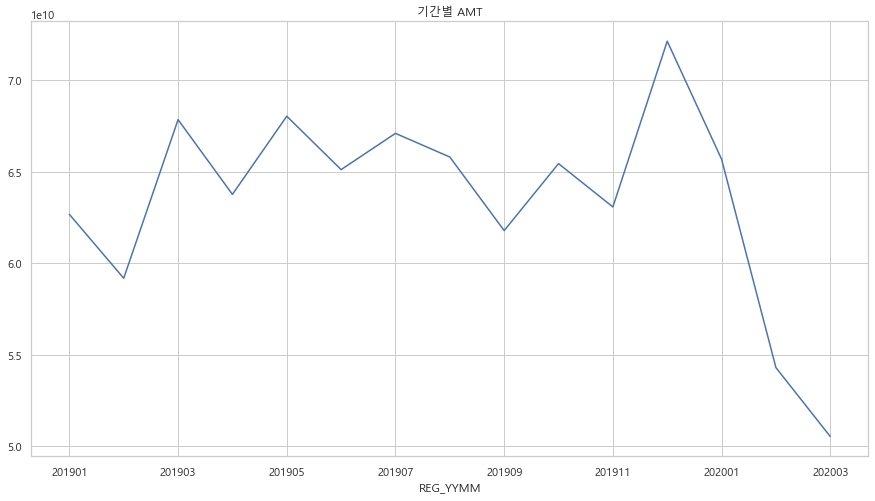

In [9]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

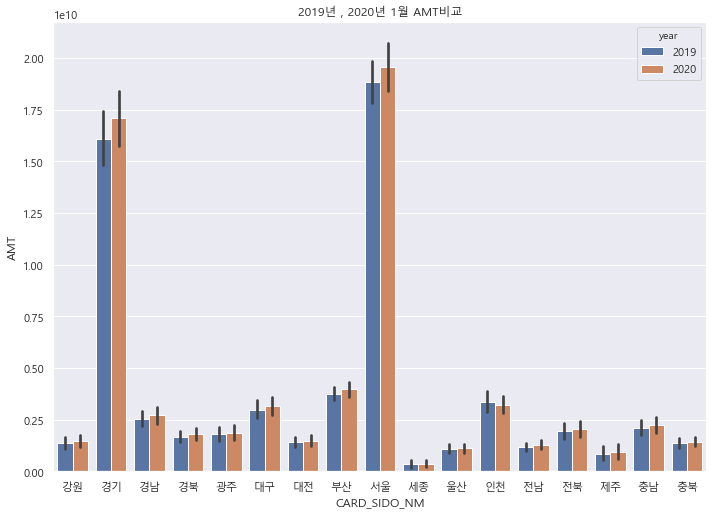

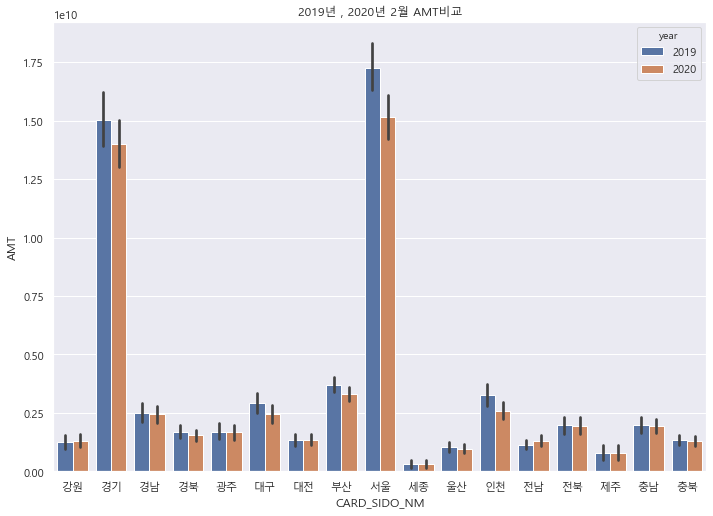

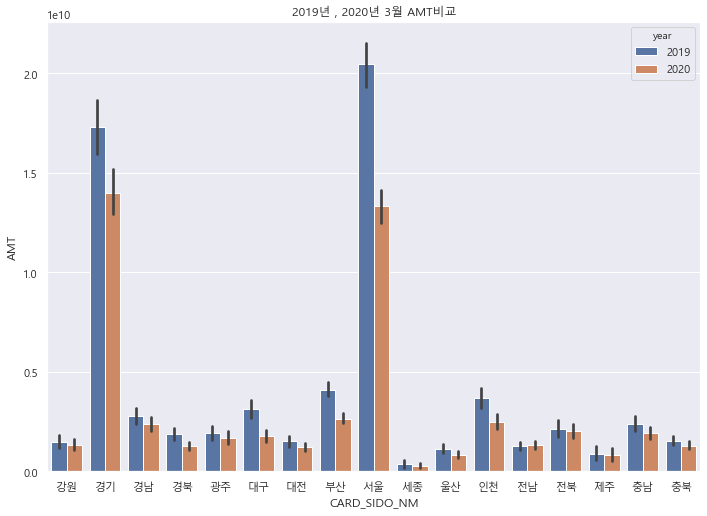

In [10]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

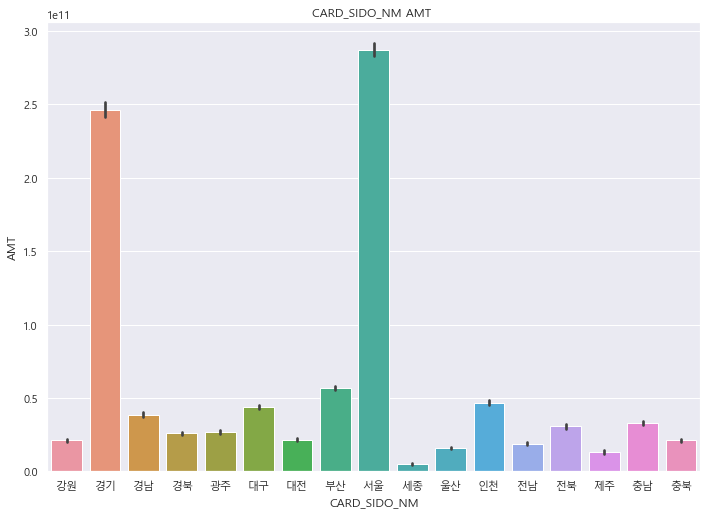

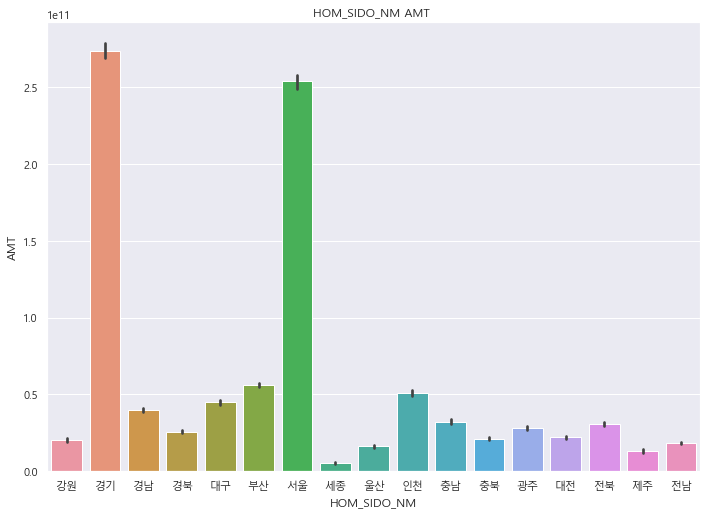

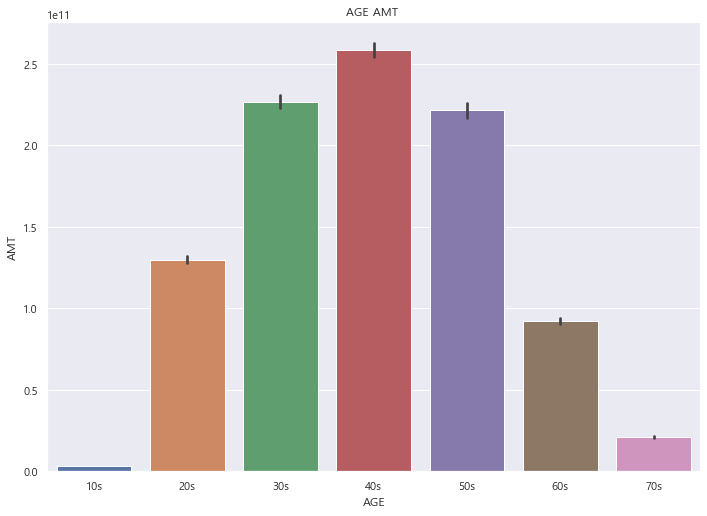

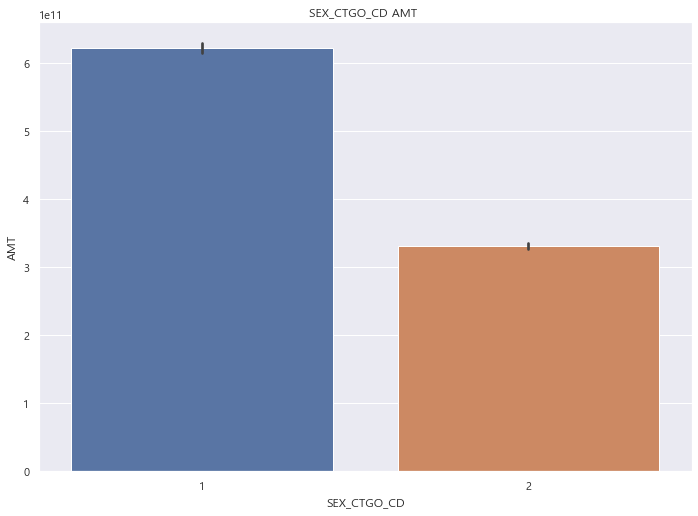

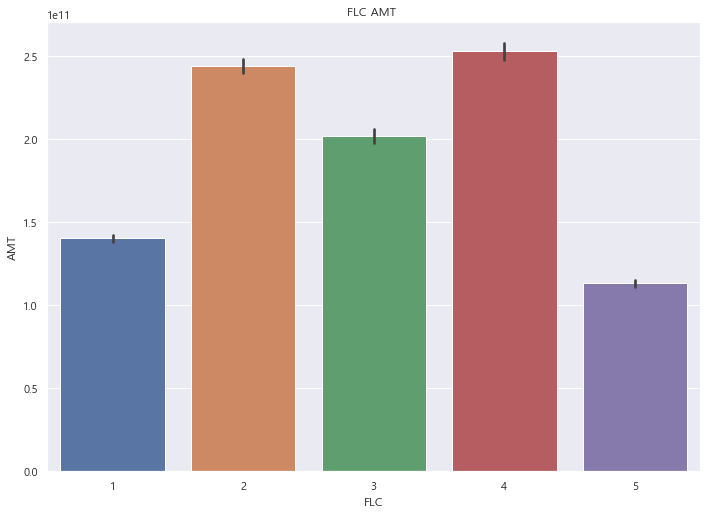

In [11]:
cols = ['CARD_SIDO_NM', 'HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()